In [602]:
# основные библиотеки
import pandas as pd
import numpy as np
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns

# разделение датасета на для обучения
from sklearn.model_selection import train_test_split

# модели обучения
from sklearn.linear_model import LogisticRegression

In [603]:
# качаем датасет с кегла
od.download('https://www.kaggle.com/datasets/devzohaib/eligibility-prediction-for-loan')

Skipping, found downloaded files in ".\eligibility-prediction-for-loan" (use force=True to force download)


In [604]:
df = pd.read_csv('eligibility-prediction-for-loan/Loan_Data.csv')

In [605]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [606]:
# Очень много категриальных признаков, причем бинарных - пол/семейное положение/собственный бизнес
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [607]:
df.shape

(614, 13)

In [608]:
# столбец Loan_id не несет никаого смысла. удаляем
df.drop(columns='Loan_ID', inplace=True)

In [609]:
# смотрим уникальные записи в столбцах с типом Object
df[df.select_dtypes('object').columns].agg(['unique']).values.tolist()

[[array(['Male', 'Female', nan], dtype=object),
  array(['No', 'Yes', nan], dtype=object),
  array(['0', '1', '2', '3+', nan], dtype=object),
  array(['Graduate', 'Not Graduate'], dtype=object),
  array(['No', 'Yes', nan], dtype=object),
  array(['Urban', 'Rural', 'Semiurban'], dtype=object),
  array(['Y', 'N'], dtype=object)]]

In [610]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [611]:
# Начнем с базового варианта
# Сохраним таргет
# Удалим все категориальные признаки

In [612]:
df_target = df.Loan_Status
df_clean_base = df.drop(columns=df.select_dtypes('object').columns, inplace=False)

In [613]:
df_target.shape, df_clean_base.shape

((614,), (614, 5))

In [614]:
df_clean_base.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [615]:
df_clean_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    int64  
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         592 non-null    float64
 3   Loan_Amount_Term   600 non-null    float64
 4   Credit_History     564 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 24.1 KB


In [616]:
# Заполним пропуски методом SimpleImputer используя медиану
from sklearn.impute import SimpleImputer

col_names = df_clean_base.columns.values
imputer = SimpleImputer(missing_values = np.nan, strategy ='median')
df_clean_base = pd.DataFrame(imputer.fit_transform(df_clean_base), columns=col_names)

In [617]:
df_clean_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    float64
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         614 non-null    float64
 3   Loan_Amount_Term   614 non-null    float64
 4   Credit_History     614 non-null    float64
dtypes: float64(5)
memory usage: 24.1 KB


In [618]:
X_train, X_test, y_train, y_test = train_test_split(df_clean_base, df_target, test_size=0.2, random_state=42)

In [619]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((491, 5), (123, 5), (491,), (123,))

In [620]:
y_train.head()

83     N
90     Y
227    Y
482    Y
464    N
Name: Loan_Status, dtype: object

In [621]:
# Объявим объект модели линейной регрессии и обучим ее
# сохраним результаты предстаказания модели по обучающей и тестовой выборкам
lr_base = LogisticRegression()
lr_base.fit(X_train, y_train)

pred_train_base = lr_base.predict(X_train)
pred_test_base = lr_base.predict(X_test)

C:\Users\generalovdb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [622]:
pred_train_base.shape, pred_test_base.shape

((491,), (123,))

In [623]:
train_report_base = classification_report(pred_train_base, y_train)
test_report_base = classification_report(pred_test_base, y_test)

In [624]:
from sklearn.metrics import classification_report

print('Обучающая выборка')
print(train_report_base)
print('Тестовая выборка')
print(test_report_base)

Обучающая выборка
              precision    recall  f1-score   support

           N       0.44      0.92      0.59        71
           Y       0.98      0.80      0.88       420

    accuracy                           0.82       491
   macro avg       0.71      0.86      0.74       491
weighted avg       0.90      0.82      0.84       491

Тестовая выборка
              precision    recall  f1-score   support

           N       0.42      0.95      0.58        19
           Y       0.99      0.76      0.86       104

    accuracy                           0.79       123
   macro avg       0.70      0.85      0.72       123
weighted avg       0.90      0.79      0.82       123



In [625]:
# микрометрики подходят когда нет дисбаланса внутри признаков
df_target.value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [626]:
df_target[df_target=='Y'].count()*100/df_target.shape[0]

np.float64(68.72964169381108)

In [627]:
# в нашем случае лучше использовать макрометрики
# при этом вес класса внутри признака значения не имеет, те важность для оценки низкая
# взвешенные метрики нужны если есть дисбаланс классов и при этом нам важно учесть их веса


In [628]:
# ПЕРЕЙДЕМ К ДЕТАЛЬНОМУ АНАЛИЗУ

# 1. Наличие пропусков
# 2. Наличие аномалий и выбросов
# 3. Наличие взаимосвязей
# 4. Характер распределения признаков

In [629]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [630]:
# количество пропусков в признаках
print(df.isna().sum())

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [631]:
cat_cols=df.select_dtypes('object').columns.tolist()
num_cols=df.select_dtypes(['float64', 'int64']).columns.tolist()

<Axes: >

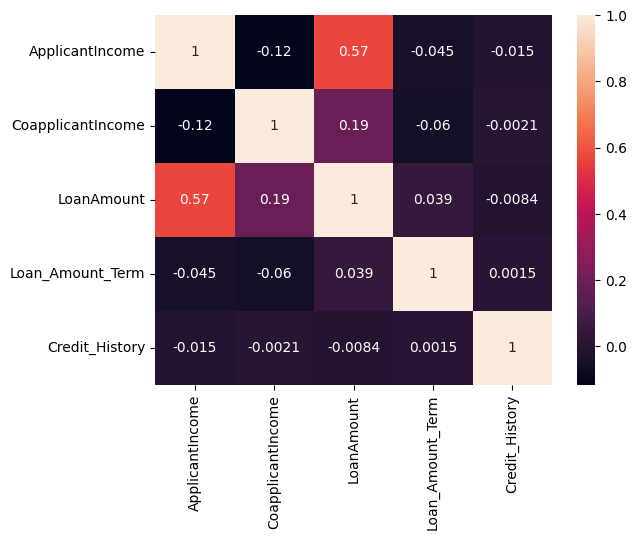

In [632]:
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True)
# наибольшая связь между признаками у доходов заемщика и суммой займа

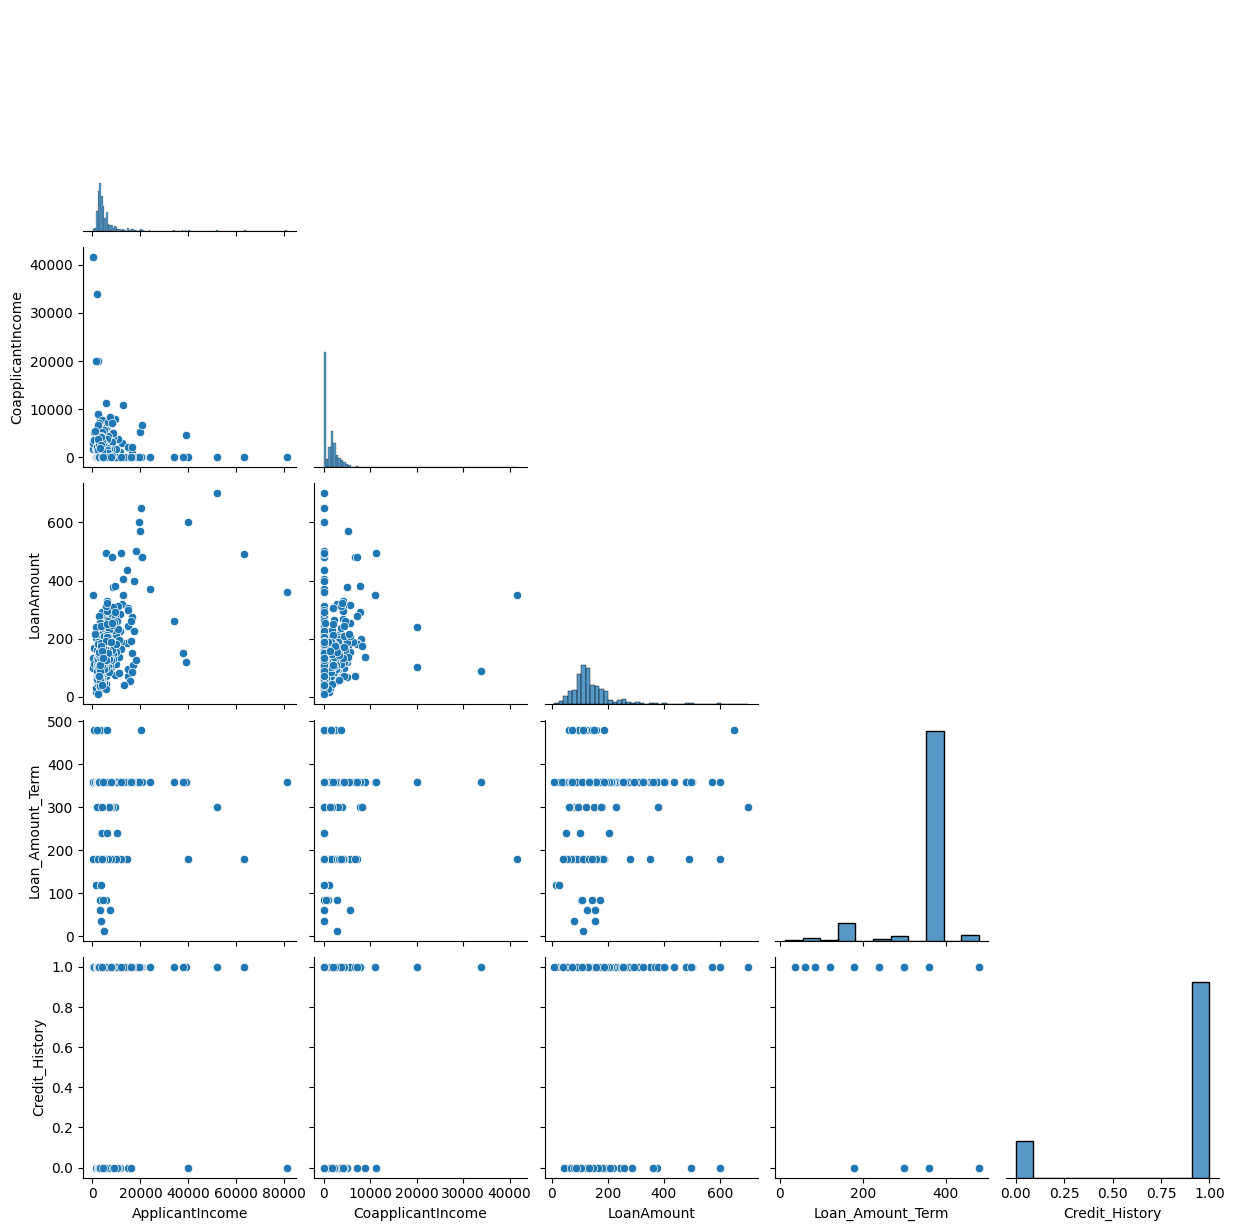

In [633]:
sns.pairplot(df[num_cols], corner=True)

In [634]:
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    int64  
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         592 non-null    float64
 3   Loan_Amount_Term   600 non-null    float64
 4   Credit_History     564 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 24.1 KB


<Axes: xlabel='ApplicantIncome', ylabel='Count'>

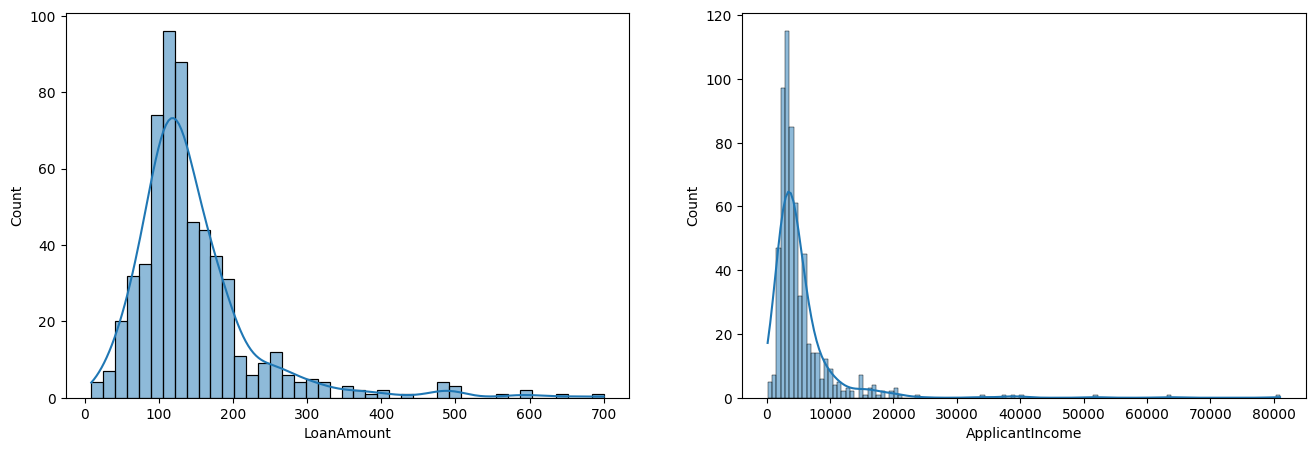

In [635]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df.LoanAmount, kde=True)
plt.subplot(1,2,2)
sns.histplot(df.ApplicantIncome, kde=True)

In [636]:
df[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         601 non-null    object
 1   Married        611 non-null    object
 2   Dependents     599 non-null    object
 3   Education      614 non-null    object
 4   Self_Employed  582 non-null    object
 5   Property_Area  614 non-null    object
 6   Loan_Status    614 non-null    object
dtypes: object(7)
memory usage: 33.7+ KB


<Axes: xlabel='Education', ylabel='count'>

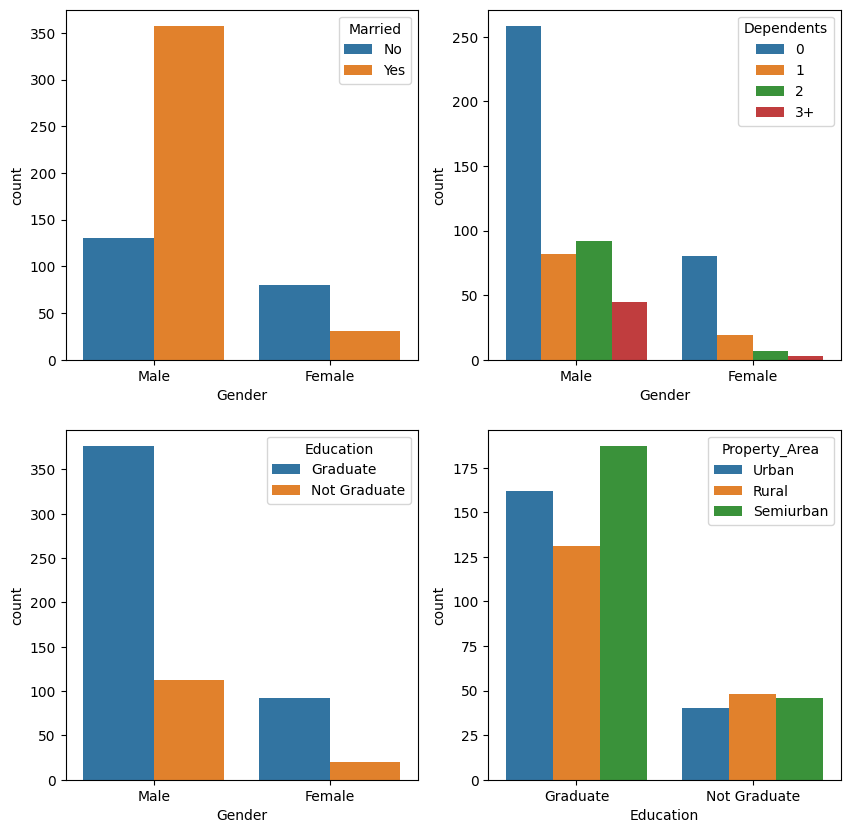

In [637]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(x='Gender',hue='Married', data=df[cat_cols])
plt.subplot(2,2,2)
sns.countplot(x='Gender', hue='Dependents', data=df[cat_cols])
plt.subplot(2,2,3)
sns.countplot(x='Gender', hue='Education', data=df[cat_cols])
plt.subplot(2,2,4)
sns.countplot(x='Education', hue='Property_Area', data=df[cat_cols])

In [638]:
# ПРИСТУПИМ К ПОДГОТОВКЕ ДАННЫХ

In [639]:
X = df.drop(columns='Loan_Status')
y = df.Loan_Status
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [640]:
# 1. Надо заполнить пропуски, при этом для категориальных признаков будем использовать моду
# 2. Преобразовать категориальные признаки
# 3. Далее масштабируем числовые признаки

In [641]:
# Создаем пайплайны для заполнения пропусков и преобразования категориальных признаков
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline


cat_transforms = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)
num_transforms = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

In [642]:
cat_cols=X.select_dtypes('object').columns.tolist()
num_cols=X.select_dtypes(['float64', 'int64']).columns.tolist()

In [643]:
from sklearn.compose import ColumnTransformer

features = ColumnTransformer([
    ('cat', cat_transforms, cat_cols),
    ('num', num_transforms, num_cols)
])

features.fit_transform(X_train).shape

(491, 20)

In [644]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491 entries, 83 to 102
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             479 non-null    object 
 1   Married            490 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          491 non-null    object 
 4   Self_Employed      467 non-null    object 
 5   ApplicantIncome    491 non-null    int64  
 6   CoapplicantIncome  491 non-null    float64
 7   LoanAmount         475 non-null    float64
 8   Loan_Amount_Term   479 non-null    float64
 9   Credit_History     451 non-null    float64
 10  Property_Area      491 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 46.0+ KB


In [645]:
from sklearn.base import BaseEstimator, TransformerMixin


class DataPipeline(BaseEstimator, TransformerMixin):
    
    def __init__(self, num_features, cat_features):
        self.num_features = num_features
        self.cat_features = cat_features 

        self.quans_99 = {}
        self.medians = {}   
        
    def fit(self, df, y=None):
        
        for num_col in self.num_features:
            q_99 = df[num_col].quantile(q=0.99)
            self.quans_99[num_col] = q_99
            self.medians[num_col] = df[num_col].median()

        return self
        
    def transform(self, df, y=None):
        
        for num_col in self.num_features:
            df.loc[df[num_col] > self.quans_99[num_col], num_col] = self.medians[num_col]

        if 'Loan_ID' in df.columns:
            df.drop(columns='Loan_ID', inplace=True)

        return df

In [646]:
pipe = make_pipeline(
    DataPipeline(num_features=num_cols,
                 cat_features=cat_cols),
                 features
)

X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)

In [647]:
X_train.shape, X_test.shape

((491, 20), (123, 20))

In [648]:
# Обучаем модель

lr = LogisticRegression()
lr.fit(X_train, y_train)

pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

In [649]:
train_report = classification_report(pred_train, y_train)
test_report = classification_report(pred_test, y_test)

In [650]:
print('Обучающая выборка c обработкой')
print(train_report)
print('Тестовая выборка с обработкой')
print(test_report)

Обучающая выборка c обработкой
              precision    recall  f1-score   support

           N       0.44      0.92      0.59        71
           Y       0.98      0.80      0.88       420

    accuracy                           0.82       491
   macro avg       0.71      0.86      0.74       491
weighted avg       0.90      0.82      0.84       491

Тестовая выборка с обработкой
              precision    recall  f1-score   support

           N       0.42      0.90      0.57        20
           Y       0.97      0.76      0.85       103

    accuracy                           0.78       123
   macro avg       0.70      0.83      0.71       123
weighted avg       0.88      0.78      0.81       123



In [651]:
print('Обучающая выборка без обработки')
print(train_report_base)
print('Тестовая выборка без обработки')
print(test_report_base)

Обучающая выборка без обработки
              precision    recall  f1-score   support

           N       0.44      0.92      0.59        71
           Y       0.98      0.80      0.88       420

    accuracy                           0.82       491
   macro avg       0.71      0.86      0.74       491
weighted avg       0.90      0.82      0.84       491

Тестовая выборка без обработки
              precision    recall  f1-score   support

           N       0.42      0.95      0.58        19
           Y       0.99      0.76      0.86       104

    accuracy                           0.79       123
   macro avg       0.70      0.85      0.72       123
weighted avg       0.90      0.79      0.82       123



In [652]:
# ВЫВОДЫ:

# 1. Постобработка не дала существенного увеличения качества модели тк метрики качества не изменились
# 2. Вероятно влияние качественныхпризнаков на таргет очень незначительное
# 3. Тем не менее модель:
# не очень хорошо оцениват плохих заемщиков тк precision = 0.44, 
# те больше половины она посчитала как плохие, однако они фактически благонадежные
# при этом она достаточно точно выявляет плохих заемщиков тк recall = 0.92
# те среди реально плохих заемщиков она пропускает только 7% 

# в оценке благонадежных заемщиков модель более качественно предсказывает результаты тк  precision / recall = 0.98 / 0.80

# тк категории заемщиков не сбалансированы то лучше опираться на критерии macro или weighted
# но из-за того что в данных преобладает больше благонадежных заемщиков = 68.7%, то и weighted критерии получаются выше
# поэтому оптимально использовать macro критерии тк они не учитывают вес категорий
